### les importations neccessaires :

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental import preprocessing
from keras  import Sequential
from keras import layers

### les deux méthodes suivantes peuvent importer les image dans jupyter notebook




In [5]:
#importation de dataset 

dataset = keras.preprocessing.image_dataset_from_directory(
  'A:\datasets\PetImages', batch_size=64, image_size=(200, 200), shuffle=True, seed=None, validation_split=None,)

Found 25000 files belonging to 2 classes.


In [13]:
#importation de dataset en batches avec application de preprocess 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset2 = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory='A:\datasets\PetImages', target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

Found 25000 images belonging to 2 classes.


### cette fonction affiche 10 images (1 batch)







Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

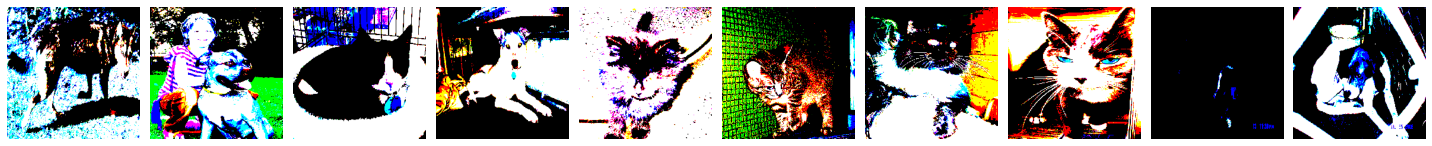

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [7]:


imgs,labels=next(dataset2)


def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)
print(labels)    
    


### on peut ajouter des couches dans le modèle afin de faire quelques opération de preprocessing telque :
- redimensionement 
- scaling
- CenterCrop

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


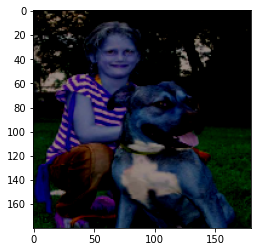

In [21]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  preprocessing.Rescaling(1./255)
])

result = resize_and_rescale(imgs[1])
_ = plt.imshow(result)

### on peut aussi ajouter des couches dans le modèle afin de faire quelques opération de preprocessing telque :
- RandomFlip :  retourner aléatoirement chaque image horizontalement et verticalement
- RandomRotation :  faire tourner chaque image de façon aléatoire.
- RandomContrast :  ajuster le contraste d'une ou plusieurs images par un facteur aléatoire
- RandomCrop :  recadrage aléatoire des images à la hauteur et à la largeur cibles
- RandomZoom :  Zoomer aléatoirement chaque image pendant la formation 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


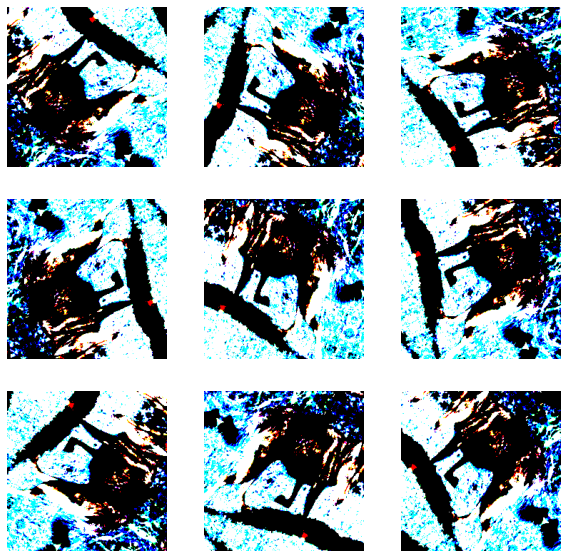

In [30]:
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal_and_vertical"),
  preprocessing.RandomRotation(0.2),
])

# Add the image to a batch
image = tf.expand_dims(imgs[0], 0)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

### l'augmentation de données peut etre une partie de modele 
Lors de l'exportation de modèle . les couches de prétraitement seront enregistrées avec le reste de votre modèle. Si on déploy , normalisera automatiquement les images

In [31]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
    # le reste de modele
    
])





In [37]:
!cd C:\Windows\System32\code\detection_documents_falsifi-s_DataInception
